# Predicting the price value of FIFA players

In [1]:
# import liabrary / tools
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt




In [2]:
# load datast file 
df = pd.read_csv('Data/FIFA_players_21_dataset.csv')
# see max columns
pd.set_option('display.max_columns', None)
df

,name,age,height_cm,weight_kg,overall,value_eur,player_positions,preferred_foot,shooting,passing,defending,attacking_crossing,attacking_finishing,attacking_heading_accuracy,skill_dribbling,skill_curve,skill_fk_accuracy,skill_ball_control,movement_sprint_speed,movement_reactions,power_jumping,power_stamina,power_strength
0,Lionel Andrés Messi Cuccittini,33,170,72,93,67500000,"RW, ST, CF",Left,92.0,91.0,38.0,85,95,70,96,93,94,96,80,94,68,72,69
1,Cristiano Ronaldo dos Santos Aveiro,35,187,83,92,46000000,"ST, LW",Right,93.0,81.0,35.0,84,95,90,88,81,76,92,91,95,95,84,78
2,Jan Oblak,27,188,87,91,75000000,GK,Right,NaN,NaN,NaN,13,11,15,12,13,14,30,60,88,78,41,78
3,Robert Lewandowski,31,184,80,91,80000000,ST,Right,91.0,78.0,43.0,71,94,85,85,79,85,88,78,93,84,76,86
4,Neymar da Silva Santos Júnior,28,175,68,91,90000000,"LW, CAM",Right,85.0,86.0,36.0,85,87,62,95,88,89,95,89,91,62,81,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18939,Kevin Angulo,24,176,73,47,40000,CM,Right,37.0,50.0,41.0,45,37,43,44,35,35,46,62,51,57,40,51
18940,Mengxuan Zhang,21,177,70,47,35000,CB,Right,23.0,26.0,50.0,23,16,45,19,21,22,24,56,48,65,55,45
18941,王政豪,20,185,74,47,35000,CB,Right,25.0,29.0,45.0,20,20,46,35,20,25,30,49,45,69,58,55
18942,Zitong Chen,23,186,80,47,40000,CM,Right,35.0,48.0,44.0,38,32,45,45,35,35,48,60,51,56,48,63


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18944 entries, 0 to 18943
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   name                        18944 non-null  object 
 1   age                         18944 non-null  int64  
 2   height_cm                   18944 non-null  int64  
 3   weight_kg                   18944 non-null  int64  
 4   overall                     18944 non-null  int64  
 5   value_eur                   18944 non-null  int64  
 6   player_positions            18944 non-null  object 
 7   preferred_foot              18944 non-null  object 
 8   shooting                    16861 non-null  float64
 9   passing                     16861 non-null  float64
 10  defending                   16861 non-null  float64
 11  attacking_crossing          18944 non-null  int64  
 12  attacking_finishing         18944 non-null  int64  
 13  attacking_heading_accuracy  189

In [4]:
# check the null value
print(df.isnull().sum())

name                             0
age                              0
height_cm                        0
weight_kg                        0
overall                          0
value_eur                        0
player_positions                 0
preferred_foot                   0
shooting                      2083
passing                       2083
defending                     2083
attacking_crossing               0
attacking_finishing              0
attacking_heading_accuracy       0
skill_dribbling                  0
skill_curve                      0
skill_fk_accuracy                0
skill_ball_control               0
movement_sprint_speed            0
movement_reactions               0
power_jumping                    0
power_stamina                    0
power_strength                   0
dtype: int64


In [5]:
# drop name columne from the dataset
df = df.drop('name', axis=1)
# drop value_eur row with 0 value from the dataset
df = df.loc[df['value_eur']!=0]
# drop all other rows with null value from the dataset
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16654 entries, 0 to 18943
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   age                         16654 non-null  int64  
 1   height_cm                   16654 non-null  int64  
 2   weight_kg                   16654 non-null  int64  
 3   overall                     16654 non-null  int64  
 4   value_eur                   16654 non-null  int64  
 5   player_positions            16654 non-null  object 
 6   preferred_foot              16654 non-null  object 
 7   shooting                    16654 non-null  float64
 8   passing                     16654 non-null  float64
 9   defending                   16654 non-null  float64
 10  attacking_crossing          16654 non-null  int64  
 11  attacking_finishing         16654 non-null  int64  
 12  attacking_heading_accuracy  16654 non-null  int64  
 13  skill_dribbling             166

In [6]:

# Create dummies for preferred_foot
player_foot = df['preferred_foot'].str.get_dummies(sep=', ').add_prefix('foot_')
# Replace preferred_foot with the new output dummies
df = pd.concat([df.drop(['preferred_foot'],axis=1), player_foot],axis=1)

# Create dummies for player position
new_player_position = df['player_positions'].str.get_dummies(sep=', ').add_prefix('position_')
# Replace player_positions with the new output dummies
df = pd.concat([df.drop(['player_positions'],axis=1), new_player_position],axis=1)


In [7]:
# Drop goolkeeper form our dataset so we can only fouces on Attack, Mid, Defence positions only
df = df.drop('position_GK', axis=1)
df['shooting'] = df['shooting'].astype(np.int64)
df['passing'] = df['passing'].astype(np.int64)
df['defending'] = df['defending'].astype(np.int64)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16654 entries, 0 to 18943
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   age                         16654 non-null  int64
 1   height_cm                   16654 non-null  int64
 2   weight_kg                   16654 non-null  int64
 3   overall                     16654 non-null  int64
 4   value_eur                   16654 non-null  int64
 5   shooting                    16654 non-null  int64
 6   passing                     16654 non-null  int64
 7   defending                   16654 non-null  int64
 8   attacking_crossing          16654 non-null  int64
 9   attacking_finishing         16654 non-null  int64
 10  attacking_heading_accuracy  16654 non-null  int64
 11  skill_dribbling             16654 non-null  int64
 12  skill_curve                 16654 non-null  int64
 13  skill_fk_accuracy           16654 non-null  int64
 14  skill_

In [8]:
#splitting dataset into train and test
x = df.drop('value_eur', axis=1)
y = df['value_eur']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 30)



regressor = LinearRegression()
regressor.fit(x_train, y_train)

regressor.score(x_test, y_test)

#predictions = regressor.predict(x_test)
#plt.scatter(y_test,predictions);

0.45236328810494997

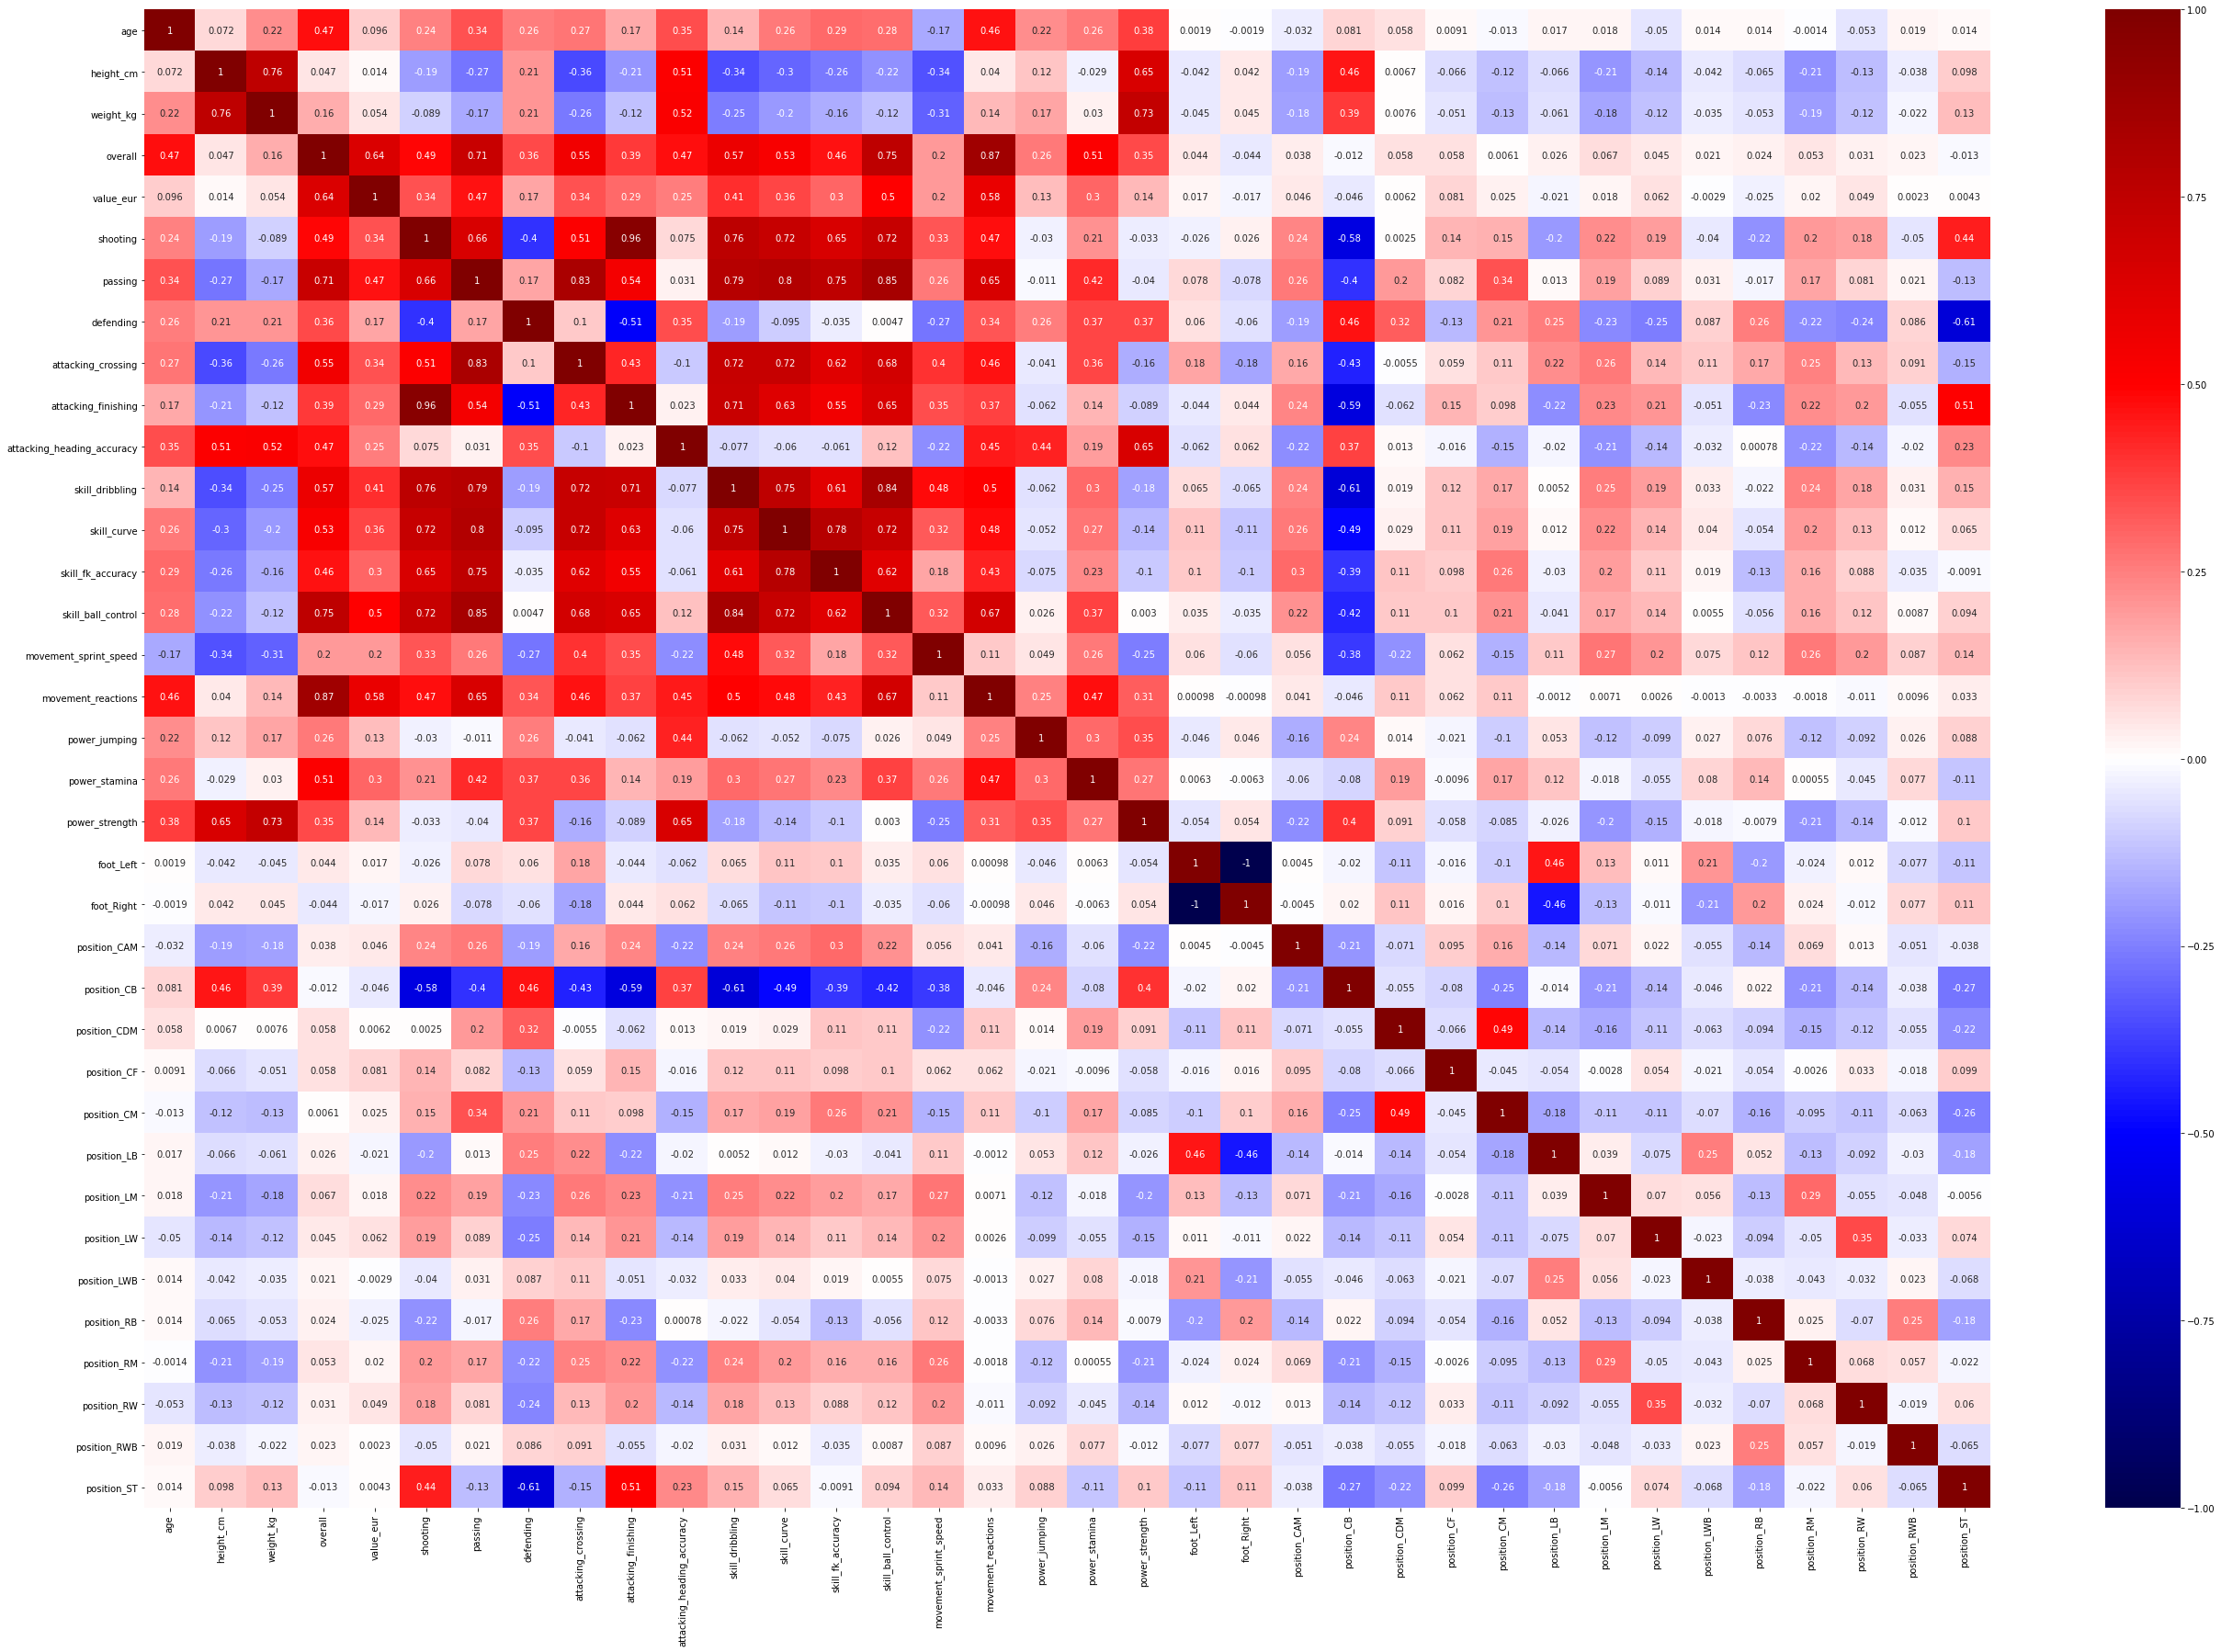

In [9]:
# View the correlations as heatmap figure
plt.figure(figsize = (45,30))
sns.heatmap(df.corr(), cmap="seismic", annot=True, vmin=-1, vmax=1);


In [ ]:
#cen_pos = df[['position_CAM','position_CDM','position_CM' ,'position_LM' ,'position_RM' ]].sum()
#print("Cen_players: ",cen_pos.sum())
#
#def_pos = df[['position_CB','position_LB','position_LWB','position_RB','position_RWB']].sum()
#print("Def_players: ",def_pos.sum())
#
#att_pos = df[['position_ST','position_CF','position_LW','position_RW']].sum()
#print("Att_players: ",att_pos.sum())
#
